In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import preprocessing as pre
from keras.models import load_model
import seaborn as sns
from tqdm import tqdm

In [2]:
def get_representations_re(autoencoder_to_test, encoders, test):

    lab = []

    res = (encoders[autoencoder_to_test].predict(test[autoencoder_to_test], verbose = False))
        # print(len(test[i]))


    features = np.array(res)
    return features
from sklearn.metrics import confusion_matrix
def obtain_cm(y_true, y_pred, labels, name):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(8, 8))
    g = sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, linewidths=.5,  annot_kws={'size': 17})
     
    g.xaxis.set_ticklabels(labels, rotation = 15,fontsize=17)
    g.yaxis.set_ticklabels(labels, rotation = 15,fontsize=17)
    g.set_xlabel("Predicted Label", fontsize=17)
    g.set_ylabel("True Label", fontsize = 17)
    plt.tight_layout()
    plt.show()
    g.figure.savefig(name)

# g.set_title(data, fontsize = 18

from sklearn.metrics import mean_squared_error

def obtain_predictions(test, autoencoders):
    y_true = []

    y_pred = []
    errors = []
    _test = []
    for n in range(len(test)):
        _test.append(test[n].to_numpy())
    for n in tqdm(range(len(df))):
        X_test = _test[n]
        cls = []

        for i in (range(len(X_test))):
            _er = []
            for encoder in autoencoders:
            #print(labels[x])
                _er.append(mean_squared_error(X_test[i],encoder.predict(X_test[i].reshape(-1,88), verbose=0).reshape(88,)))
            errors.append(_er)
            y_pred.append(np.argmin(_er))
            y_true.append(n)
    return errors, y_true, y_pred

    #pred.append(cls)
    # print(cls)




In [3]:
def mean_diff(arrays):
    max_length = max(arr.shape[0] for arr in arrays)

    padded_arrays = []
    for arr in arrays:
        pad_length = max_length - arr.shape[0]
        padded = np.pad(arr, ((0, pad_length), (0, 0)), mode='constant', constant_values=np.nan)
        padded_arrays.append(padded)

    stacked_arrays = np.stack(padded_arrays, axis=0)  
    averaged_array = np.nanmean(stacked_arrays, axis=0)
    return stacked_arrays, averaged_array
def get_emo_df(emotion, dataframe):
    emo = []
    tot = 0
    print(f"Processing {emotion} ...")
    for id, name in zip(dataframe["filename"],dataframe["label"]):
        if f"{emotion}" in name:
            emo.append(id)
            tot += 1
    print(f"Processed {tot} file for {emotion}")


    mask = dataframe['filename'].isin(emo)
    emo_df = dataframe[mask].reset_index()
    emo_df = emo_df.drop(['index'], axis=1)
    return emo_df

def get_data(df,seed):
    X = pd.concat(df["features"].tolist(), ignore_index=True)
    _X= (X-X.min())/(X.max()-X.min())
    


    X_train, X_test = train_test_split(_X, test_size=.2, random_state=seed)
    X_train, X_val = train_test_split(X_train, test_size=.1, random_state=seed)
    # print(len(X_train), len(X_val), len(X_test))
    return X_train, X_val, X_test
import seaborn as sns
import matplotlib.pyplot as plt

def get_rec_error(ae, seed, flag,labels):
    errors = {}
    for i in labels:
        errors[i] = None
    for i in range(len(labels)):
        data = df[i]
        _X_train, _X_val, _X_test = get_data(data, seed)
        if flag:
            _X_test = _X_train
        reconstructed_X = ae.predict(_X_test)
        errors[labels[i]] = mean_squared_error(_X_test,reconstructed_X)
        # mse_per_feature = ((_X_test - reconstructed_X)**2).mean(axis=0)
        # errors[labels[i]] = np.mean(mse_per_feature)
    return errors
        
# lab = ['disgust', 'joy', 'neutrality', 'fear', 'anger', 'surprise','sadness', 'guilt']



In [4]:
clear_df = pd.read_pickle("../utils/data/clear_demos.pkl")
# seed = 83
seed = 82
# clear_df = pd.read_pickle("../utils/data/clear_functional_emovo.pkl")
# seed = 10
# clear_df = pd.read_pickle("../utils/data/clear_emozionalmente.pkl")
# seed = 47

# clear_df = pd.read_pickle("../utils/data/pitch_functional_demos.pkl")
# clear_df = pd.read_pickle("../utils/data/pitch_functional_emovo.pkl")
lab = clear_df["label"].unique()
lab

array(['disgust', 'joy', 'neutrality', 'fear', 'anger', 'surprise',
       'sadness', 'guilt'], dtype=object)

In [5]:
df = []

for i,emotion in enumerate(lab):
    df.append(get_emo_df(emotion,clear_df))

Processing disgust ...
Processed 1678 file for disgust
Processing joy ...
Processed 1395 file for joy
Processing neutrality ...
Processed 332 file for neutrality
Processing fear ...
Processed 1156 file for fear
Processing anger ...
Processed 1477 file for anger
Processing surprise ...
Processed 1000 file for surprise
Processing sadness ...
Processed 1529 file for sadness
Processing guilt ...
Processed 1129 file for guilt


In [6]:
train = []
val = []
test = []
print(seed)
for data in df:
    tr, v, te = get_data(data, seed)
    train.append(tr)
    val.append(v)
    test.append(te)

82


In [7]:
def load_models(model_path,labels, i ):
    model = (model_path + labels[i] + ".keras")
    print(model)
    return load_model(model)

In [8]:
EMOVO_model_path = "../utils/paper/models/EMOVO/ae_"
DEMoS_model_path = "../utils/paper/models/DEMoS/ae_"
DEMoS1_model_path = "../utils/paper/models/DEMoS2/ae_"
emozionalmente_model_path = "../utils/paper/models/emozionalmente/ae_"

autoencoders = []
for i,emotion in enumerate(lab):
    autoencoders.append(load_models(DEMoS_model_path, lab, i))

../utils/paper/models/DEMoS/ae_disgust.keras
../utils/paper/models/DEMoS/ae_joy.keras
../utils/paper/models/DEMoS/ae_neutrality.keras
../utils/paper/models/DEMoS/ae_fear.keras
../utils/paper/models/DEMoS/ae_anger.keras
../utils/paper/models/DEMoS/ae_surprise.keras
../utils/paper/models/DEMoS/ae_sadness.keras
../utils/paper/models/DEMoS/ae_guilt.keras


In [9]:
encoders = []
for autoencoder in autoencoders:
    bottleneck_layer = autoencoder.layers[1]
    input_layer = autoencoder.layers[0]

    # Create a new model
    encoder = keras.Model(inputs=input_layer.output ,outputs=bottleneck_layer.output)
    encoders.append(encoder)


re_test = []
re_train = []
re_val = []
for i in range(len(encoders)):
    re_test.append(get_representations_re(i, encoders, test))
    re_train.append(get_representations_re(i, encoders, train))
    re_val.append(get_representations_re(i, encoders, val))


In [10]:
# EMOVO_model_path = "../utils/paper/models/EMOVO/ae_"
# DEMoS_model_path = "../utils/paper/models/DEMoS/ae_"
EMOVO_retrain_path = "model/re_train/EMOVO/ae_"
# EMOVO_sig_retrain_path = "model/re_train/EMOVO_sig/ae_"
# EMOVO_tanh_retrain_path = "model/re_train/EMOVO_tanh/ae_"
DEMoS_retrain_path = "model/re_train/DEMoS/ae_"
DEMoS1_retrain_path = "model/re_train/DEMoS1/ae_"
emozionalmente_retrain_path = "model/re_train/emozionalmente/ae_"


re_encoders = []
for i,emotion in enumerate(lab):
    re_encoders.append(load_models(DEMoS_retrain_path, lab, i))

model/re_train/DEMoS/ae_disgust.keras
model/re_train/DEMoS/ae_joy.keras
model/re_train/DEMoS/ae_neutrality.keras
model/re_train/DEMoS/ae_fear.keras
model/re_train/DEMoS/ae_anger.keras
model/re_train/DEMoS/ae_surprise.keras
model/re_train/DEMoS/ae_sadness.keras
model/re_train/DEMoS/ae_guilt.keras


In [11]:
def get_representations(autoencoder_to_test, encoders, test):
    res = []
    lab = []
    for i in range(len(test)):
        res.append(encoders[autoencoder_to_test].predict(test[i], verbose = False))
        # print(len(test[i]))
        if i == autoencoder_to_test:
            lab.append([1]* len(test[i]))
        else:
            lab.append([0]* len(test[i]))

    features = np.concatenate(res, axis=0)
    labels = np.concatenate(lab, axis=0)
    return features, labels


In [12]:
tot_features = []
tot_labels = []
for i in range(len(re_encoders)):
    features, labels = get_representations(i, re_encoders, re_test)
    tot_features.append(features)
    tot_labels.append(labels)
# feat = features.reshape(-1,17,2)

In [13]:
tot_target = []
tot_non_target = []

for i in range(len(tot_features)): 

    data_array = tot_features[i]
    mask_array = tot_labels[i]

    tot_target.append(data_array[mask_array == 1])
    tot_non_target.append(data_array[~(mask_array == 1)])

# tot_target = np.array(tot_target)
# tot_non_target = np.array(tot_non_target)

In [14]:
t_features, averaged_1 = mean_diff(tot_target)
nt_features, averaged_2 = mean_diff(tot_non_target)
tot_t_features = []
for i in range(len(t_features)):
    tot_t_features.append(t_features[i][~np.isnan(t_features[i])].reshape(-1,2))


tot_nt_features = []
for i in range(len(nt_features)):
    tot_nt_features.append(nt_features[i][~np.isnan(nt_features[i])].reshape(-1,2))

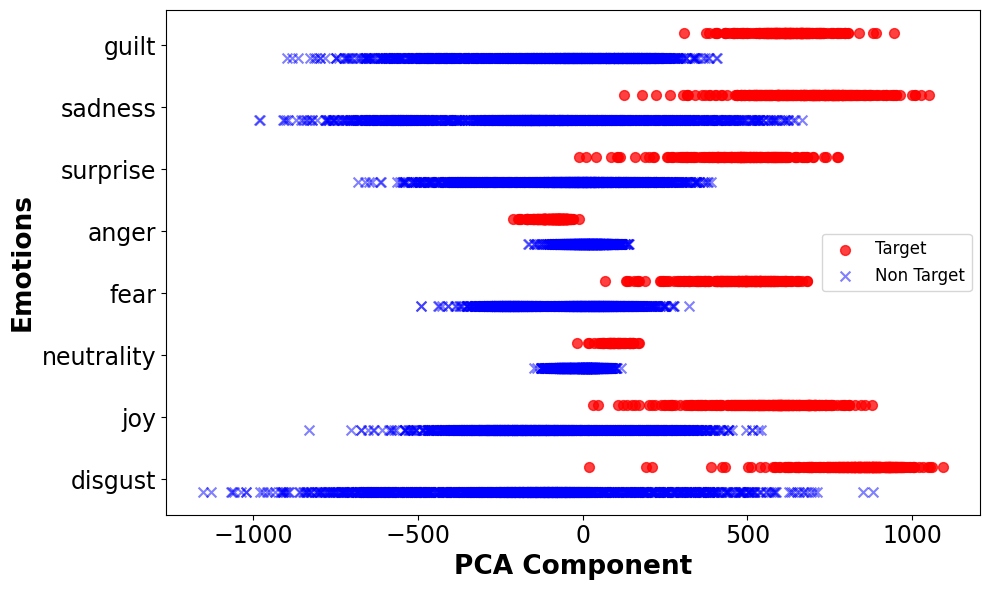

In [15]:
from sklearn.decomposition import PCA
tot = []
dims = []
for n in range(len(tot_t_features)):
    pca_t = PCA(n_components=1)
    dims.append(len(tot_t_features[n]))
    ciolla = np.concatenate([tot_t_features[n], tot_nt_features[n]])
    t_features_pca = pca_t.fit_transform(ciolla)
    t_features_pca = t_features_pca.reshape(ciolla.shape[0], -1)
    tot.append(t_features_pca)
t_features_pca = np.array(tot)

plt.figure(figsize=(10, 6))

for i in range(t_features_pca.shape[0]):
    # Plot the first dims[i] of t_features_pca
    plt.scatter(t_features_pca[i, :dims[i]], [i+1.2] * len(t_features_pca[0, :dims[i]]), marker="o", color="red", alpha=0.75, label="Target" if i == 0 else "", s=50)

    # Plot the remaining t_features_pca
    plt.scatter(t_features_pca[i, dims[i]:], [i+0.8] * len(t_features_pca[0, dims[i]:]), marker="x", color="blue", alpha=0.5, label="Non Target" if i == 0 else "", s=50)
    plt.yticks(range(1, t_features_pca.shape[0] + 1), labels=lab)
    plt.tick_params(axis='both', which='major', labelsize=17)
plt.xlabel('PCA Component', fontsize=19, fontweight='bold')
plt.ylabel('Emotions', fontsize=19, fontweight='bold')
# plt.title('Plot of latent space representations of Target and Non-target features', fontsize=18)
plt.legend(prop={'size': 12})
plt.tight_layout()
# plt.savefig("emozionalmente_sfalzati.png")
plt.show()


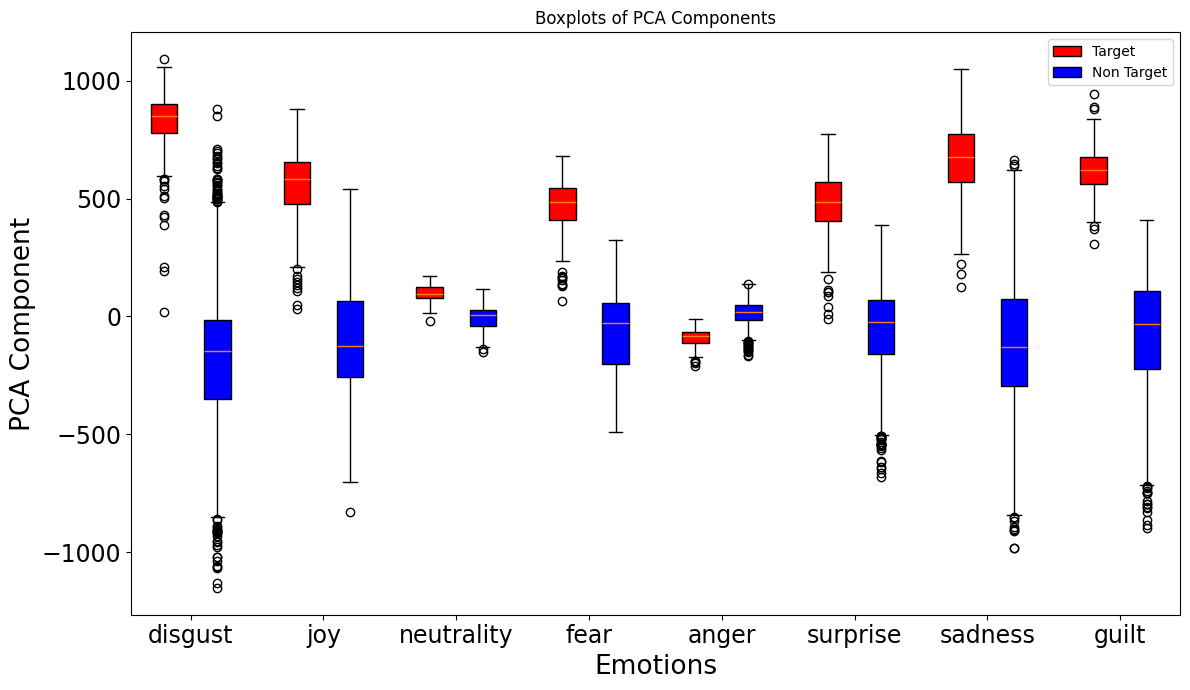

In [16]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Create the boxplots
positions1 = np.arange(len(t_features_pca)) * 2.0 -0.8
positions2 = positions1 + 0.8

tot_cose = []
target = []
non_target = []
for i in range((t_features_pca.shape[0])):
    target.append(t_features_pca[i, :dims[i]].reshape(t_features_pca[i, :dims[i]].shape[0],))
    non_target.append(t_features_pca[i, dims[i]:].reshape(t_features_pca[i, dims[i]:].shape[0],))
    tot_cose.append(t_features_pca[i, :dims[i]].reshape(t_features_pca[i, :dims[i]].shape[0],))
    tot_cose.append(t_features_pca[i, dims[i]:].reshape(t_features_pca[i, dims[i]:].shape[0],))



ax.boxplot(target, positions=positions1, widths=0.4, patch_artist=True, boxprops=dict(facecolor="red"), label="Target")
ax.boxplot(non_target, positions=positions2, widths=0.4, patch_artist=True, boxprops=dict(facecolor="blue"), label="Non Target")

# Set the x-axis labels
ax.set_xticks((positions1 + positions2) / 2)
ax.set_xticklabels(lab)
plt.tick_params(axis='both', which='major', labelsize=17)
# Set the labels and title
ax.set_xlabel('Emotions', fontsize=19)
ax.set_ylabel('PCA Component', fontsize=19)
ax.set_title('Boxplots of PCA Components')

plt.legend(loc="upper right")
# Show the plot
plt.tight_layout()
# plt.savefig("boxplot_interpret_emozionalmente.png")
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: t-test independent samples, P_val:0.000e+00 t=5.706e+01
2 vs. 3: t-test independent samples, P_val:1.468e-318 t=4.658e+01
4 vs. 5: t-test independent samples, P_val:3.294e-74 t=1.904e+01
6 vs. 7: t-test independent samples, P_val:0.000e+00 t=5.215e+01
8 vs. 9: t-test independent samples, P_val:6.870e-230 t=-3.728e+01
10 vs. 11: t-test independent samples, P_val:2.907e-234 t=3.775e+01
12 vs. 13: t-test independent samples, P_val:5.448e-286 t=4.318e+01
14 vs. 15: t-test independent samples, P_val:1.665e-279 t=4.250e+01


<Figure size 1200x700 with 0 Axes>

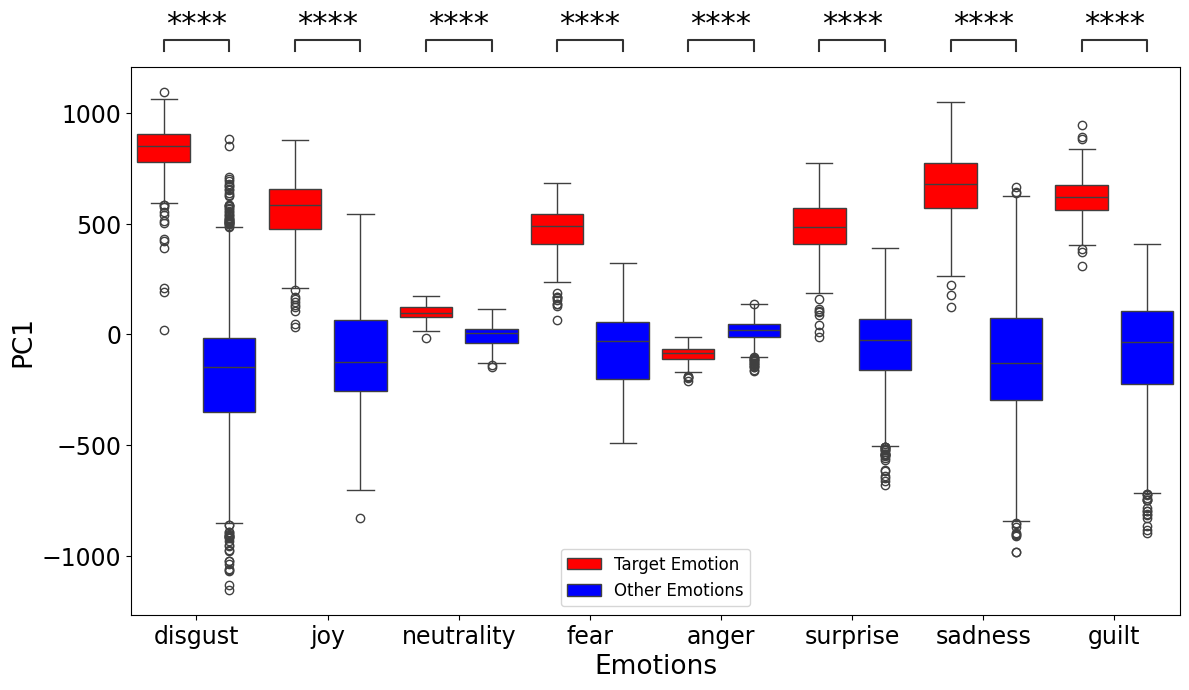

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

x = np.arange(len(tot_cose))
pairs = [(x[i], x[i+1]) for i in range(0, len(x)-1, 2)]
odd_indexes = x[x % 2 == 0] + 0.5


plt.figure(figsize=(12, 7))

ax.set_xticks(odd_indexes)
ax.set_xticklabels(lab)
# Define colors for Target and Non-Target
colors = ["red", "blue"]
labels = ["Target Emotion", "Other Emotions"]

# Create figure
plt.figure(figsize=(12, 7))

ax = sns.boxplot(data=tot_cose, patch_artist=True)

ax.set_xticks(odd_indexes)
ax.set_xticklabels(lab)
plt.tick_params(axis='both', which='major', labelsize=17)
# Track added labels to avoid duplicates
added_labels = set()

# Iterate over each box and apply alternating colors with unique legend labels
for i, patch in enumerate(ax.patches):  
    color = colors[i % 2]  # Red for even, Blue for odd
    label = labels[i % 2]  # Assign label based on even/odd
    
    patch.set_facecolor(color)  # Set box color
    
    # Only add unique labels to the legend
    if label not in added_labels:
        patch.set_label(label)
        added_labels.add(label)

# Set the labels and title
ax.set_xlabel('Emotions', fontsize=19)
ax.set_ylabel('PC1', fontsize=19)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define legend elements
legend_elements = [
    mpatches.Patch(color='none', label=r'ns: $5.00\times10^{-2} < p \leq 1.00$'),
    mpatches.Patch(color='none', label=r'*: $1.00\times10^{-2} < p \leq 5.00\times10^{-2}$'),
    mpatches.Patch(color='none', label=r'**: $1.00\times10^{-3} < p \leq 1.00\times10^{-2}$'),
    mpatches.Patch(color='none', label=r'***: $1.00\times10^{-4} < p \leq 1.00\times10^{-3}$'),
    mpatches.Patch(color='none', label=r'****: $p \leq 1.00\times10^{-4}$')
]


# Add legend
# ax.legend(handles=legend_elements, loc="outside", title="p-value Annotation", prop={'size': 12})
 
annot = Annotator(ax, pairs, data=tot_cose)
annot.configure(test="t-test_ind", text_format="star", loc="outside", fontsize=22)
annot.apply_and_annotate()

plt.legend(prop={'size': 12})

plt.tight_layout()
plt.savefig("DEMOS_LS.png")
plt.show()





In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define legend elements
legend_elements = [
    mpatches.Patch(color='none', label=r'ns: $5.00\times10^{-2} < p \leq 1.00$'),
    mpatches.Patch(color='none', label=r'*: $1.00\times10^{-2} < p \leq 5.00\times10^{-2}$'),
    mpatches.Patch(color='none', label=r'**: $1.00\times10^{-3} < p \leq 1.00\times10^{-2}$'),
    mpatches.Patch(color='none', label=r'***: $1.00\times10^{-4} < p \leq 1.00\times10^{-3}$'),
    mpatches.Patch(color='none', label=r'****: $p \leq 1.00\times10^{-4}$')
]


# Add legend
ax.legend(handles=legend_elements, loc='upper right', title="p-value Annotation")

# Show plot
plt.show()
